In [75]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.under_sampling import NearMiss
card=pd.read_csv("E:\\itsstudytym\\assignments\\Random Forest\\Fraud_check.csv")
card.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [43]:
card['Undergrad']=pd.get_dummies(card['Undergrad'],drop_first=True)
card['Urban']=pd.get_dummies(card['Urban'],drop_first=True)
Married=pd.get_dummies(card['Marital.Status'],drop_first=True)
Married.head()

,Married,Single
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [44]:
card=pd.concat([card,Married],axis=1)
card=card.drop('Marital.Status',axis=1)
card.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,68833,50047,10,1,0,1
1,1,33700,134075,18,1,0,0
2,0,36925,160205,30,1,1,0
3,1,50190,193264,15,1,0,1
4,0,81002,27533,28,0,1,0


In [45]:
card.describe()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,55208.375000,108747.368333,15.558333,0.503333,0.323333,0.361667
std,0.500017,26204.827597,49850.075134,8.842147,0.500406,0.468139,0.480884
min,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000
50%,1.000000,55074.500000,106493.500000,15.000000,1.000000,0.000000,0.000000
75%,1.000000,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000
max,1.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000


## Factore for Taxable.Income

In [46]:
for i in range(0,len(card['Taxable.Income'])):
    if card['Taxable.Income'][i] <= 30000:
        card['Taxable.Income'][i]=0
    else:
        card['Taxable.Income'][i]=1
    
card.head()

C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,1,50047,10,1,0,1
1,1,1,134075,18,1,0,0
2,0,1,160205,30,1,1,0
3,1,1,193264,15,1,0,1
4,0,1,27533,28,0,1,0


## Scalling of dataset

In [47]:
scale=MinMaxScaler()

In [48]:
scale.fit(card.iloc[:,:])
card.iloc[:,:]=scale.transform(card.iloc[:,:])

In [49]:
card.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0.0,1.0,0.139472,0.333333,1.0,0.0,1.0
1,1.0,1.0,0.622394,0.600000,1.0,0.0,0.0
2,0.0,1.0,0.772568,1.000000,1.0,1.0,0.0
3,1.0,1.0,0.962563,0.500000,1.0,0.0,1.0
4,0.0,1.0,0.010081,0.933333,0.0,1.0,0.0


In [52]:
card.iloc[:,:2]=card.iloc[:,:2].astype(int)
card.iloc[:,4:]=card.iloc[:,4:].astype(int)
card.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,1,0.139472,0.333333,1,0,1
1,1,1,0.622394,0.600000,1,0,0
2,0,1,0.772568,1.000000,1,1,0
3,1,1,0.962563,0.500000,1,0,1
4,0,1,0.010081,0.933333,0,1,0


In [54]:
X=card.drop('Taxable.Income',axis=1)
y=card['Taxable.Income']

## Split data into train and test dataset

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=False)

## Under_sampling

In [64]:
nm=NearMiss(version=1)
X_res,y_res=nm.fit_sample(X_train,y_train)

In [65]:
from collections import Counter
print(Counter(X_res))
Counter(y_res)

Counter({'Undergrad': 1, 'City.Population': 1, 'Work.Experience': 1, 'Urban': 1, 'Married': 1, 'Single': 1})


Counter({0: 81, 1: 81})

## RandomForest Model

In [66]:
RFM=RandomForestClassifier(n_estimators=50)
RFM.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_pred=RFM.predict(X_test)

In [73]:
RFM.score(X_test,y_test)
cm=confusion_matrix(y_pred,y_test)
cm

array([[32, 95],
       [11, 42]], dtype=int64)

C:\Users\sonih\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


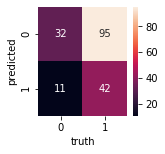

In [74]:
import seaborn as sbn

plt.figure(figsize=(2,2))
sbn.heatmap(cm,annot=True)
plt.xlabel('truth')
plt.ylabel('predicted')
plt.show()